<a href="https://colab.research.google.com/github/79AceVo/Text-analytics/blob/main/Text_Classification_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification

In this NB we will use traditional ML to classify texts

we will try Naive Bayes, Linear Models, and Support Vector Machine.

In [ ]:
#load the libraries

import numpy as np
import pandas as pd
import itertools

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import sklearn
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec, KeyedVectors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
 #get the data
 !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1zSroquVDCgXGUIT8ABFkJC235Ic2l5in' -O econ_news.csv

--2025-02-21 21:35:47--  https://drive.google.com/uc?export=download&id=1zSroquVDCgXGUIT8ABFkJC235Ic2l5in
Resolving drive.google.com (drive.google.com)... 74.125.135.101, 74.125.135.100, 74.125.135.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.135.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1zSroquVDCgXGUIT8ABFkJC235Ic2l5in&export=download [following]
--2025-02-21 21:35:47--  https://drive.usercontent.google.com/download?id=1zSroquVDCgXGUIT8ABFkJC235Ic2l5in&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.142.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.142.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12383529 (12M) [application/octet-stream]
Saving to: ‘econ_news.csv’

econ_news.csv       100%[===================>]  11.81M  --.-KB/s 

In [ ]:
df = pd.read_csv("/content/econ_news.csv", encoding = "ISO-8859-1") #need encoding because default UTF-8 does not work

#let's do some data exploration

In [ ]:
df.shape #here is our table. 800 rows and 15 columns

(8000, 15)

In [ ]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,positivity,positivity:confidence,relevance,relevance:confidence,articleid,date,headline,positivity_gold,relevance_gold,text
0,842613455,False,finalized,3,12/5/15 17:48,3.0,0.6400,yes,0.640,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NaN,NaN,NEW YORK -- Yields on most certificates of dep...
1,842613456,False,finalized,3,12/5/15 16:54,NaN,NaN,no,1.000,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,NaN,NaN,The Wall Street Journal Online</br></br>The Mo...
2,842613457,False,finalized,3,12/5/15 1:59,NaN,NaN,no,1.000,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,NaN,NaN,WASHINGTON -- In an effort to achieve banking ...
3,842613458,False,finalized,3,12/5/15 2:19,NaN,0.0000,no,0.675,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,NaN,NaN,The statistics on the enormous costs of employ...
4,842613459,False,finalized,3,12/5/15 17:48,3.0,0.3257,yes,0.640,wsj_398838054,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NaN,NaN,NEW YORK -- Indecision marked the dollar's ton...


In [ ]:
df.columns #here are all the columns


Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'positivity', 'positivity:confidence', 'relevance',
       'relevance:confidence', 'articleid', 'date', 'headline',
       'positivity_gold', 'relevance_gold', 'text'],
      dtype='object')

In [ ]:
df.describe() #here are some stats

,_unit_id,_trusted_judgments,positivity,positivity:confidence,relevance:confidence,positivity_gold,relevance_gold
count,8.000000e+03,8000.0,1420.000000,3775.000000,8000.000000,0.0,0.0
mean,8.367995e+08,3.0,4.985211,0.188450,0.859009,NaN,NaN
std,5.816278e+06,0.0,1.680357,0.269593,0.166180,NaN,NaN
min,8.309816e+08,3.0,2.000000,0.000000,0.336400,NaN,NaN
25%,8.309836e+08,3.0,3.000000,0.000000,0.669700,NaN,NaN
50%,8.367995e+08,3.0,5.000000,0.000000,1.000000,NaN,NaN
75%,8.426155e+08,3.0,7.000000,0.345800,1.000000,NaN,NaN
max,8.426175e+08,3.0,9.000000,1.000000,1.000000,NaN,NaN


In [ ]:
df.describe(include="O") #here are some stats with text entry

,_unit_state,_last_judgment_at,relevance,articleid,date,headline,text
count,8000,8000,8000,8000,8000,8000,8000
unique,1,1229,3,8000,6109,7698,7994
top,finalized,11/18/15 8:27,no,wsj_398217788,10/27/87,Business and Finance,The economic slump has yet to damp innovation ...
freq,8000,36,6571,1,6,86,2


In [ ]:
df["relevance"].value_counts() #here are the raw numbers

,count
relevance,
no,6571
yes,1420
not sure,9


In [ ]:
df["relevance"].value_counts() /len(df) #here are percentage

,count
relevance,
no,0.821375
yes,0.177500
not sure,0.001125


So in this dataset, the majority, 82% is not US Economy related, only 17%. This is understandable, and also common, for most classification task. There is also a very small percent of "not sure", which we should ignore.

Data Imbalance is really common. There are may ways to treat it, and there are ongoing debates on if treatment is necessary at all.

But for now, let's focus on the binary classification task. We will relabel no as 0 (not relevant), yes as 1 (relevant).


## Data Preprocessing

In [ ]:
df = df[df["relevance"]!="not sure"] #get rid of not sure

In [ ]:
df.shape #check to see if the 9 is gone. should be 7991 in the rows now

(7991, 15)

In [ ]:
df["relevance"] = df["relevance"].map({'yes':1, 'no':0}) #mapping of yes to 1 and no to 0

#since we only need some column, let's reduce the dataframe

data = df[["text","relevance","headline"]]

<ipython-input-92-ec082df854fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relevance"] = df["relevance"].map({'yes':1, 'no':0}) #mapping of yes to 1 and no to 0


In [ ]:
data #here is the data for analysis. now we can feel free to start precocessing the texts like we know.

,text,relevance,headline
0,NEW YORK -- Yields on most certificates of dep...,1,Yields on CDs Fell in the Latest Week
1,The Wall Street Journal Online</br></br>The Mo...,0,The Morning Brief: White House Seeks to Limit ...
2,WASHINGTON -- In an effort to achieve banking ...,0,Banking Bill Negotiators Set Compromise --- Pl...
3,The statistics on the enormous costs of employ...,0,Manager's Journal: Sniffing Out Drug Abusers I...
4,NEW YORK -- Indecision marked the dollar's ton...,1,Currency Trading: Dollar Remains in Tight Rang...
...,...,...,...
7995,Secretary of Commerce Charles W. Sawyer said y...,1,"Sawyer Sees Strong Economy For 2 Years, Truce ..."
7996,"U.S. stocks inched up last week, overcoming co...",0,Oil's losses are airlines' gains
7997,Ben S. Bernanke cleared a key hurdle Thursday ...,0,Full Senate to vote on Bernanke; PANEL ADVANCE...
7998,The White House's push to contract out many fe...,0,Reinventing Opportunities


In [ ]:
#let's take a look at some data

data.loc[2,"text"] #here is the third line data

"WASHINGTON -- In an effort to achieve banking reform, Senate negotiators and the Bush administration have agreed to drop efforts to allow banks to expand further into the securities business.</br></br>The compromise is one of several the Senate Banking Committee is pursuing to remove obstacles its banking bill will face when the Senate starts voting on the measure, perhaps today. The latest version of the House banking bill also drops the administration's proposals to broaden bank entry into the securities business.</br></br>Last night, the House began its second attempt to pass a banking bill after failing last week, in part because of disagreement over how to allow banks into the securities business. The House adopted on a voice vote provisions that would replenish the bank deposit insurance fund, tighten bank regulation, trim the scope of deposit insurance, and restrict the Federal Reserve Board's ability to keep sick banks alive with loans.</br></br>But the House delayed until tod

In [ ]:
stop_words_nltk = set(stopwords.words('english'))
def clean(doc): # doc is a string of text

    pdoc = doc.replace("</br>", " ")
    pdoc= pdoc.split()
    pdoc = [char for char in pdoc if char not in string.punctuation and not char.isdigit()]
    pdoc = [token for token in pdoc if token not in stop_words_nltk]
    pdoc = " ".join(pdoc) #join all the elements from the list with each other again, separated by space
    return pdoc

In [ ]:
df["text"] = df["text"].apply(lambda row : clean(row))

In [ ]:
df["text"] #text looks ok for now, let's go to model

,text
0,NEW YORK -- Yields certificates deposit offere...
1,The Wall Street Journal Online The Morning Bri...
2,WASHINGTON -- In effort achieve banking reform...
3,The statistics enormous costs employee drug ab...
4,"NEW YORK -- Indecision marked dollar's tone, t..."
...,...
7995,Secretary Commerce Charles W. Sawyer said yest...
7996,"U.S. stocks inched last week, overcoming conce..."
7997,Ben S. Bernanke cleared key hurdle Thursday co...
7998,The White House's push contract many federal f...


## Modeling

Modeling usually follows the same step,

1) Split data to train and test (80/20 is the rule of thumb, but you can change this ratio)

2) Create feature out of text. This time we use BoW , so we use CountVectorizer to creat ehe feature

3) transform both test and train data the same way

4) train the classifier

5) evaluate the classifier



In [ ]:
# Step 1: train-test split
X = data.text # the column text contains textual data to extract features from
y = data.relevance # this is the column we are learning to predict.
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
# random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)
print(X_train.shape, y_train.shape) #check to seee if the
print(X_test.shape, y_test.shape)

(7991,) (7991,)
(5993,) (5993,)
(1998,) (1998,)


In [ ]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) # instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
# i.e., the dimension of our feature vector is 49753!

(5993, 45758) (1998, 45758)


In [ ]:
# Step 3: Train the classifier and predict for test data
%time
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(X_train_dtm, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)




Accuracy:  0.7617617617617618
ROC_AOC_Score:  0.7221365864338786


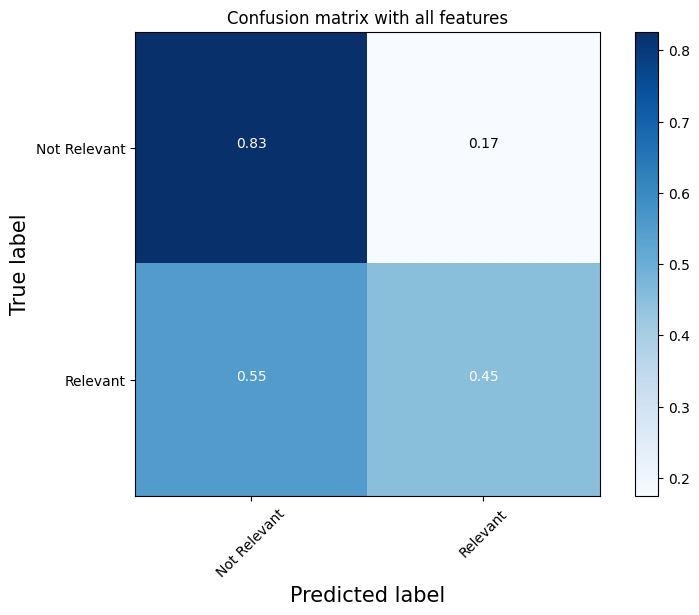

In [ ]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))


# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
print("ROC_AOC_Score: ", metrics.roc_auc_score(y_test, y_pred_prob))

In [ ]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1656
           1       0.35      0.45      0.39       342

    accuracy                           0.76      1998
   macro avg       0.61      0.64      0.62      1998
weighted avg       0.79      0.76      0.77      1998



## Lime

In [ ]:
!pip install lime

In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline


In [ ]:

y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
c = make_pipeline(vect, nb)
mystring = list(X_test)[221] #Take a string from test instance
print(c.predict_proba([mystring])) #Prediction is a "No" here. i.e., not relevant
class_names = ["no", "yes"] #not relevant, relevant
explainer = LimeTextExplainer(class_names=class_names)


NameError: name 'nb' is not defined

In [ ]:
mystring

"NEW YORK, March 19 (AP) \x89ÛÓ The Dow Jones industrial average re treated further from the 1,000 level at the stock market turned in a mixed and erratic showing yesterday.</br></br>The trend of stock prices varied widely from one industry group to another. Oil issues sold off, but savings and loan issues were strong following the recent decline in interest rates.</br></br>Some brokerage-house issues also moved up on word of Prudential Insurance\x89Ûªs plans to acquire Bache Group.</br></br>The Dow Jones average of 30 industrials, which had crossed 1,000 briefly early in the week, dropped 7.48 points to 986.58.</br></br>York; Exxon was down l'/a at 68; Mobil dropped 1% to 64'/t, Superior Oil 2% to 211%, and Cities Service 4% to 42%."

In [ ]:
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=20)
exp.as_list()

[('211', 0.26794201706988063),
 ('Superior', 0.1855487300963757),
 ('Exxon', 0.16830340339765246),
 ('Dow', 0.1441586658232252),
 ('Jones', 0.1407406781199598),
 ('dropped', 0.1367790172320441),
 ('house', -0.12545066012240483),
 ('Bache', 0.11992104270997614),
 ('acquire', -0.119654782814531),
 ('crossed', -0.11544537898183775),
 ('treated', -0.11448724810026198),
 ('loan', -0.10248350031397066),
 ('briefly', 0.10226814490699324),
 ('Insurance', -0.09721339671698068),
 ('issues', -0.09257375149072163),
 ('Cities', 0.09188493898848488),
 ('savings', -0.08974151189620233),
 ('986', 0.08914650053846702),
 ('Mobil', 0.08772937701877355),
 ('Service', -0.06783970693450808)]

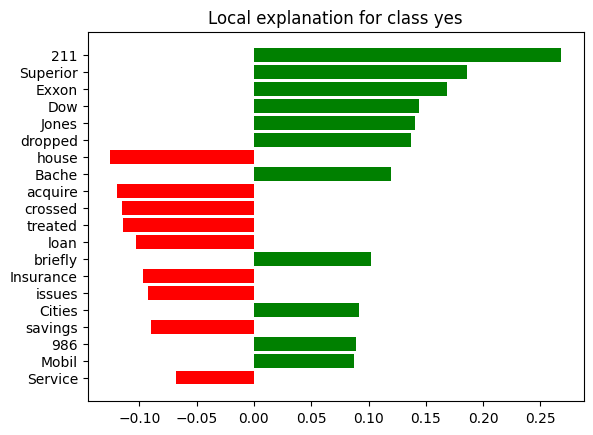

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

### Hyperparameter tuning

One of the thing is the important class 1 is low. so we need to improve it.

Let's limit features of countvectorizer to... let's say 5000




In [ ]:
# Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean, max_features = 5000) # instantiate a vectoriezer
X_train_dtm1 = vect.fit_transform(X_train)# use it to extract features from training data
# transform testing data (using training data's features)
X_test_dtm1 = vect.transform(X_test)
print(X_train_dtm1.shape, X_test_dtm.shape)


(5993, 5000) (1998, 45758)


In [ ]:
# Step 3: Train the classifier and predict for test data
%time
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(X_train_dtm1, y_train) # train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm1) # make class predictions for X_test_dtm

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.3 µs


Accuracy:  0.6831831831831832
ROC_AOC_Score:  0.725559369438088


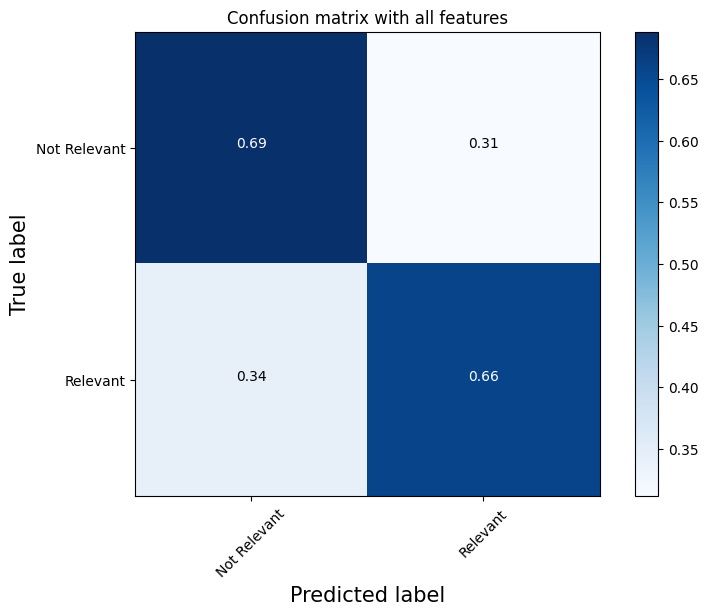

In [ ]:
# Print accuracy:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))


# print the confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with all features')

# calculate AUC: Area under the curve(AUC) gives idea about the model efficiency:
# Further information: https://en.wikipedia.org/wiki/Receiver_operating_characteristic
y_pred_prob = nb.predict_proba(X_test_dtm1)[:, 1]
print("ROC_AOC_Score: ", metrics.roc_auc_score(y_test, y_pred_prob))

In [ ]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1656
           1       0.30      0.66      0.42       342

    accuracy                           0.68      1998
   macro avg       0.61      0.67      0.60      1998
weighted avg       0.80      0.68      0.72      1998



How is the scores? Looks to be better? Can you try other parameters and see?

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### LogisticRegression

Now with the same idea, we use Logistic Regression

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.9 µs
Accuracy:  0.7402402402402403
AUC:  0.725559369438088


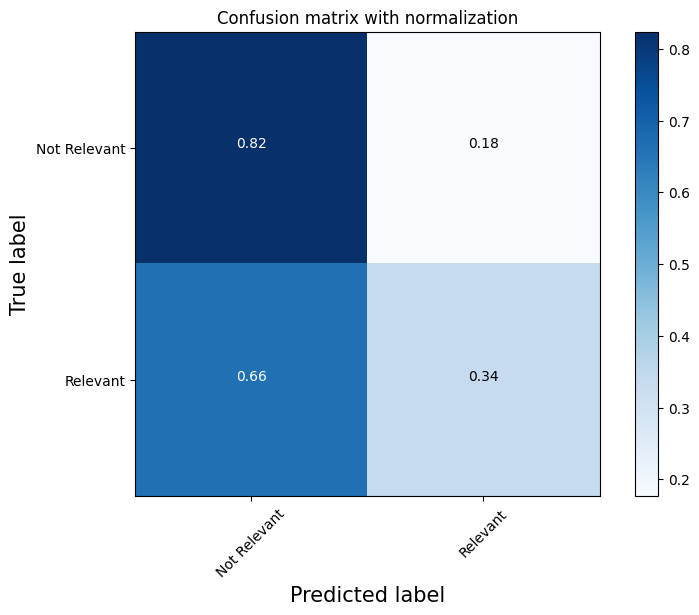

In [ ]:
logreg = LogisticRegression(max_iter=500, class_weight='balanced') # instantiate a logistic regression model, class weight balanced is to address class imbalance
logreg.fit(X_train_dtm1, y_train) # fit the model with training data

# Make predictions on test data
%time
y_pred_class = logreg.predict(X_test_dtm1)

# calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", metrics.roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

In [ ]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1656
           1       0.28      0.34      0.31       342

    accuracy                           0.74      1998
   macro avg       0.57      0.58      0.57      1998
weighted avg       0.76      0.74      0.75      1998



How is the scores? Looks to be better? Can you try other parameters and see?
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

### Support Vector Machine
Same pipeline, different models.
This time we will use support vector machine

In [ ]:
#vect = CountVectorizer(preprocessor=clean, max_features=5000) # Step-1
#X_train_dtm = vect.fit_transform(X_train) # combined step 2 and 3
#X_test_dtm = vect.transform(X_test)

classifier = LinearSVC(class_weight='balanced', max_iter = 5000) # instantiate a Support vector machine
classifier.fit(X_train_dtm1, y_train) # fit the model with training data

%time
# Make predictions on test data
y_pred_class = classifier.predict(X_test_dtm1)


CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.7 µs


Accuracy:  0.7357357357357357
AUC:  0.725559369438088


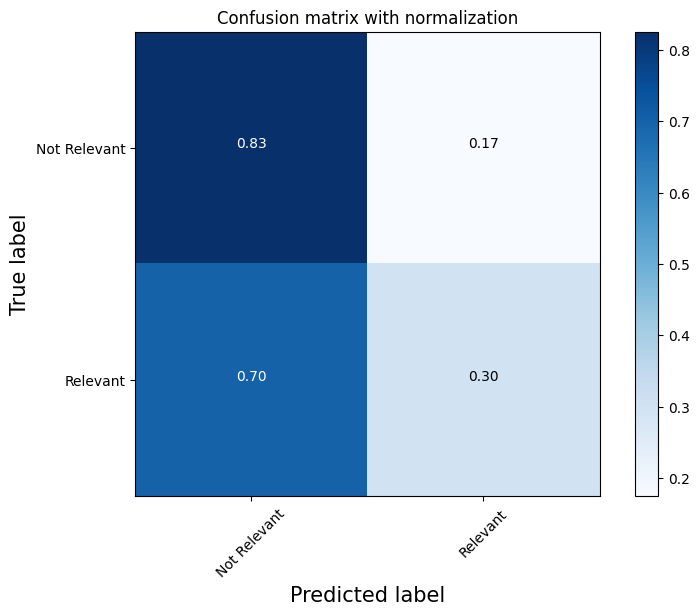

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print("AUC: ", metrics.roc_auc_score(y_test, y_pred_prob))
cnf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Not Relevant','Relevant'],normalize=True,
                      title='Confusion matrix with normalization')

In [ ]:
print(metrics.classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1656
           1       0.26      0.30      0.28       342

    accuracy                           0.74      1998
   macro avg       0.56      0.56      0.56      1998
weighted avg       0.75      0.74      0.74      1998



How is the scores? Looks to be better? Can you try other parameters and see?

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=sklearn+svm+linearsvc#sklearn.svm.LinearSVC

Ultimately, which one would you choose?

What other models you want to try? Look at SKlean Supvervised Learning
https://scikit-learn.org/stable/supervised_learning.html

There are two types of models, classification or regression. Choose the classification one. Theoretically

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html